In [118]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import re

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [119]:
# Reading in the data
df = pd.read_csv('movies.csv')

In [120]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [121]:
# Checking for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing*100))

# Looking at dtypes for the columns
df.dtypes

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [122]:
# Since we are focused on correlation, I am dropping the null values to not skew any findings
df = df.dropna()

In [123]:
# changing the data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [124]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [125]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [126]:
df.sort_values(by=['gross'],inplace=False,ascending=False).head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [127]:
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

In [128]:
df.loc[df.name.duplicated(keep=False),:].sort_values(by='name').head()

name rating      genre  year  \
5712  A Nightmare on Elm Street      R      Crime  2010   
483   A Nightmare on Elm Street      R     Horror  1984   
7481                    Aladdin     PG  Adventure  2019   
2056                    Aladdin      G  Animation  1992   
3196              Anna Karenina  PG-13      Drama  1997   

                               released  score     votes      director  \
5712     April 30, 2010 (United States)    5.2   95000.0  Samuel Bayer   
483   November 16, 1984 (United States)    7.5  212000.0    Wes Craven   
7481       May 24, 2019 (United States)    6.9  239000.0   Guy Ritchie   
2056  November 25, 1992 (United States)    8.0  382000.0  Ron Clements   
3196      April 4, 1997 (United States)    6.3    5600.0  Bernard Rose   

             writer                star         country     budget  \
5712  Wesley Strick  Jackie Earle Haley   United States   35000000   
483      Wes Craven  Heather Langenkamp   United States    1800000   
7481    John August          Will Smith  United Kingdom  183000000   
2056   Ron Clements       Scott Weinger   United States   28000000   
3196    Lev Tolstoy      Sophie Marceau   United States   35000000   

           gross                           company  runtime  yearcorrect  
5712   115695182                   New Line Cinema     95.0         2010  
483     25507137                   New Line Cinema     91.0         1984  
7481  1050693953              Walt Disney Pictures    128.0         2019  
2056   504050219              Walt Disney Pictures     90.0         1992  
3196      858553  Icon Entertainment International    108.0         1997

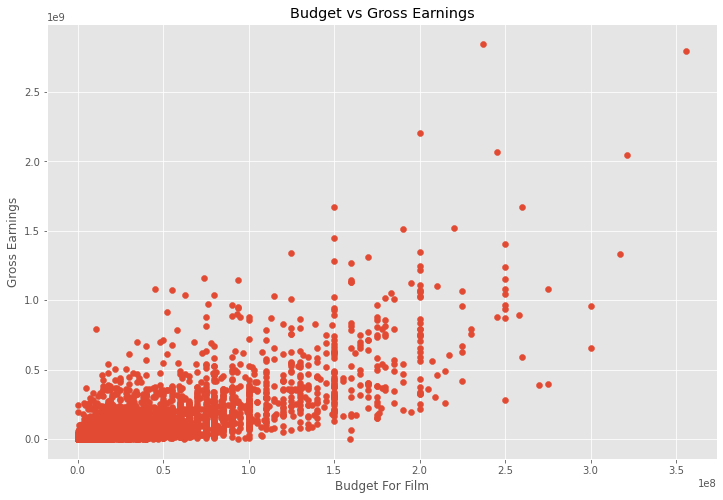

In [129]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

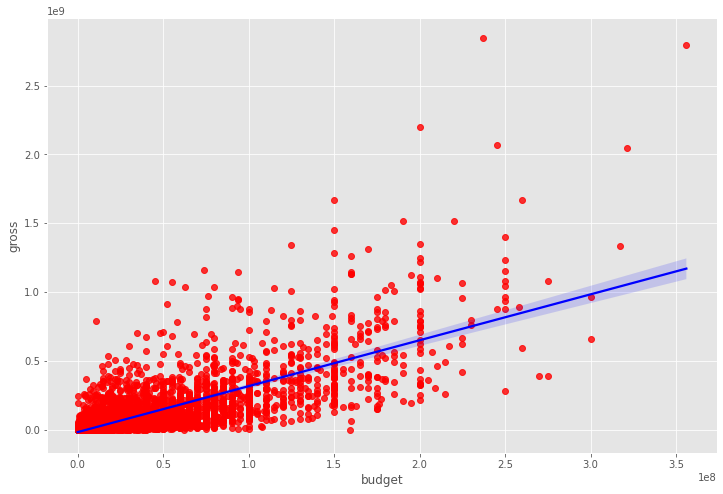

In [130]:
# Plotting budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"});

In [131]:
# Variable correlation
df.corr()

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [132]:
#pearson,kendall,spearman

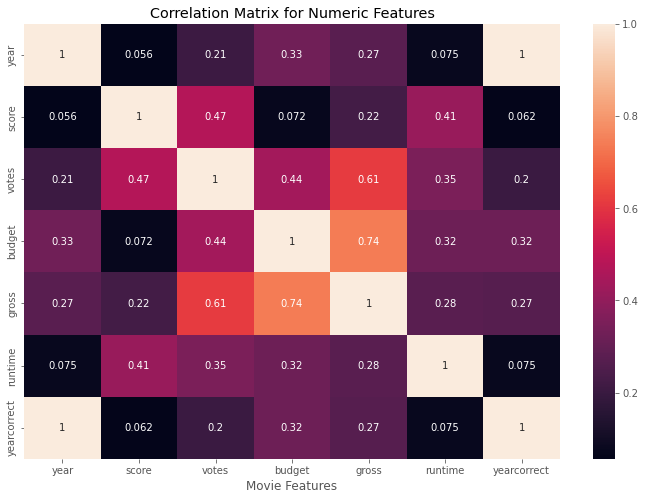

In [133]:
correlation_matrix =df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.xlabel("Movie Features")
plt.show()

In [134]:
# Looking at companies
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
5     1509       6      9  1980      1922    6.4   123000.0      1758    3081   
6     3930       6      0  1980      1359    7.9   188000.0       974     576   
7     3122       6      3  1980       530    8.2   330000.0      1269    1257   
8     3732       4      0  1980      1346    6.8   101000.0      1606    1402   
9     4401       6      3  1980      1755    7.0    10000.0      2011     280   
10     332       4      0  1980       510    6.1    18000.0       236    2810   
11    4179       4      1  1980      2272    7.3    54000.0       817    1300   
12    3029       4      1  1980       471    5.3    30000.0      1643    1658   
13    2859       6      6  1980      2416    7.7    49000.0      1666    1653   
14    1208       6      5  1980      1170    7.1    37000.0       207     350   
15    3553       4      6  1980      2294    7.2    27000.0       847    2507   
17      66       4      4  1980       530    6.9    29000.0       333    2315   
18    4143       6      9  1980       832    6.8    66000.0       943    1486   
20     986       6      5  1980       714    6.5    20000.0      2032    3151   
21    1762       6      1  1980       117    6.8    14000.0      1307    2065   
22    4128       4      0  1980       213    6.7    22000.0       502    2959   
23    5289       4      8  1980       437    5.3    12000.0      1654    2492   
28     700       6      5  1980      1359    7.2    17000.0      1870    3099   
29     261       6      5  1980       667    6.2    22000.0      1489    2358   
33     785       4      6  1980       117    6.1      604.0      1146     673   
35    3068       6      4  1980      2156    6.2    24000.0       744    2207   
36    4245       6      4  1980      1883    6.3     4300.0       581     966   
37    2618       6      4  1980      2257    6.0    11000.0      1116    2578   
42    4736       6      0  1980      1413    7.1     9000.0      1613    1802   
46    4312       6      0  1980      1304    5.3     3900.0      1337    2383   
48    4512       4      0  1980      1922    5.1     3100.0       329    2036   
50    3648       4      4  1980      2476    7.3    22000.0      2043    3184   
51    2497       6      4  1980      2416    6.8     4500.0      1025     303   
53     692       4      0  1980      1289    6.1    11000.0       327     768   
56    5193       4      0  1980      1629    4.6     2600.0       793    1078   
57    2818       4      4  1980      1051    5.4     2400.0       914    2623   
58    4519       6      0  1980       261    5.1     5200.0       551    1819   
75    4351       1      1  1980      1399    5.8     1300.0       267     939   
77    5240       6      4  1980       261    5.9      415.0      1484    1339   
80    2971       6      6  1980      2551    4.0      546.0       969    1014   
92    1973       4      0  1981      1296    8.4   905000.0      1859    1806   
94     284       6      4  1981       314    7.5    97000.0       974    1524   
95    1301       6      0  1981      1040    7.2   131000.0       943    1486   
96    4100       2      9  1981        46    7.5   192000.0      1735    2707   
97    3031       6      4  1981      1568    6.2    40000.0       177     307   
98     603       6      5  1981      1162    7.4    47000.0       207     350   
99     861       4      0  1981      1296    6.9    42000.0       478     277   
100   1329       6      1  1981        11    7.4    59000.0       937    2963   
101   2389       6      0  1981      

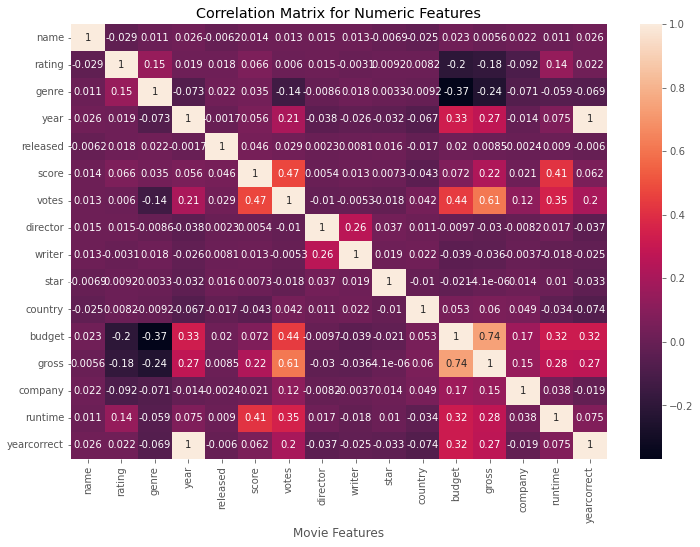

In [135]:
correlation_matrix =df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.xlabel("Movie Features")
plt.show()

In [136]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850     0.025542  
rating      -0.181906 -0.092357  0.140792     0.022021  
genre       -0.244101 -0.071334 -0.059237    -0.069147  
year         0.274321 -0.014333  0.075077     0.998726  
released     0.008501 -0.002407  0.008975    -0.005989  
score        0.222556  0.020656  0.414068     0.061923  
votes        0.614751  0.118470  0.352303     0.203098  
director    -0.029560 -0.008223  0.017433    -0.037371  
writer      -0.035885 -0.003697 -0.017561    -0.025495  
star        -0.000004  0.014082  0.010108    -0.032687  
country      0.060078  0.048569 -0.034477    -0.073569  
budget       0.740247  0.170235  0.318695     0.320312  
gross        1.000000  0.149553  0.275796     0.268721  
company      0.149553  1.000000  0.037585    -0.018806  
runtime      0.275796  0.037585  1.000000     0.075294  
yearcorrect  0.268721 -0.018806  0.075294     1.000000

In [137]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.sort_values()

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [138]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation to the gross earnings